In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FreqXlatingFIR:
    def __init__(self, taps, omega, decim = 1):
        self.rotator_phase = 0
        self.omega = omega
        self.base_taps = np.array(taps)
        self._rotate_taps()
        self.decim = decim
        self.history = np.zeros(self.base_taps.size - 1, dtype = 'complex')
    
    def _rotate_taps(self):
        self.rotated_taps = self.base_taps * np.exp(1j * self.omega * np.arange(self.base_taps.size))
    
    def work(self, x):
        x = np.array(x)
        if x.size % self.decim != 0:
            raise ValueError('Only blocks of decim samples are supported')
        xh = np.concatenate((self.history, x))
        y = np.convolve(self.rotated_taps, xh)[self.base_taps.size-1:-(self.base_taps.size-1)]
        y_dec = y[::self.decim]
        mix_phase = self.omega*self.decim*np.arange(y_dec.size + 1) + self.rotator_phase
        mix = np.exp(-1j*mix_phase[:-1])
        self.rotator_phase = mix_phase[-1]
        self.history = xh[-(self.base_taps.size-1):]
        return y_dec * mix
    
    def update_omega(self, omega):
        # correction to the rotator's phase to preserve phase continuity
        self.rotator_phase += (self.base_taps.size-1)*(omega - self.omega)/2
        self.omega = omega
        self._rotate_taps()

In [3]:
L = 11
t = np.arange(-L//2+1,L//2+1)
h = np.sinc(t*0.3)
fir = FreqXlatingFIR(h, 0.12, 3)
y1 = fir.work(np.ones(99))
fir.update_omega(0.06)
y2 = fir.work(np.ones(51))
fir.update_omega(-0.07)
y3 = fir.work(np.ones(102))
y = np.concatenate((y1,y2,y3))

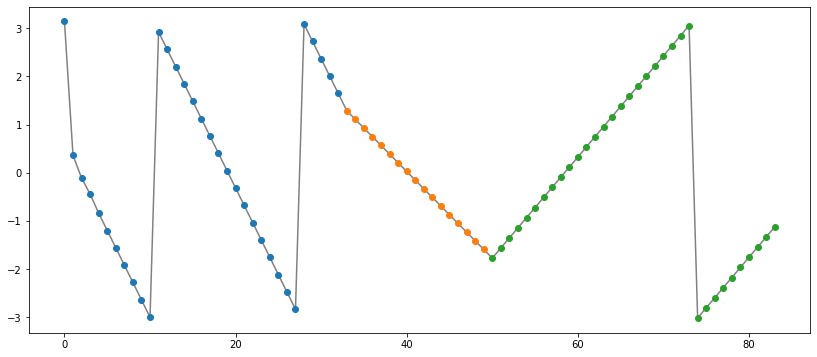

In [4]:
plt.figure(figsize = (14,6))
plt.plot(np.angle(y), color = 'grey')
plt.plot(np.angle(y1), 'o')
plt.plot(np.arange(y2.size)+y1.size, np.angle(y2), 'o')
plt.plot(np.arange(y3.size)+y2.size+y1.size, np.angle(y3), 'o')

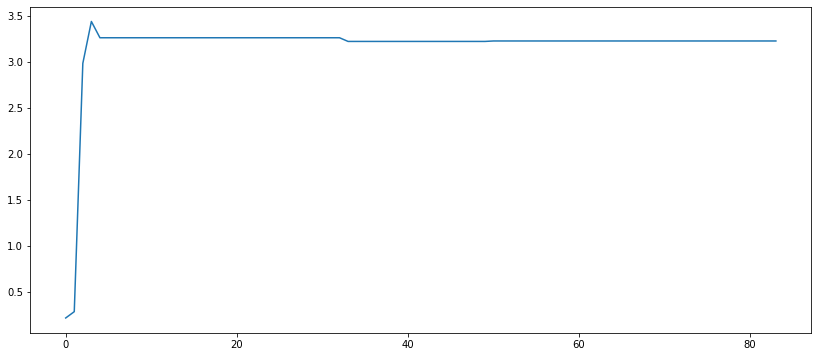

In [5]:
plt.figure(figsize = (14,6))
plt.plot(np.abs(y))

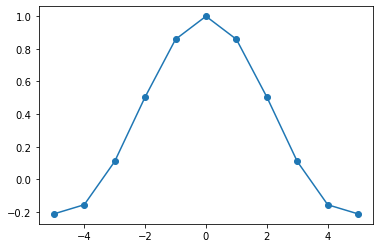

In [6]:
plt.plot(t, h, 'o-')

In [7]:
x = np.exp(1j*0.12*np.arange(1000))
fir = FreqXlatingFIR(h, 0.25, 3)
a = 0
y1 = fir.work(x[a:][:99])
a += 99
fir.update_omega(0.1)
y2 = fir.work(x[a:][:51])
a += 51
fir.update_omega(-0.15)
y3 = fir.work(x[a:][:102])
a += 102
y = np.concatenate((y1,y2,y3))

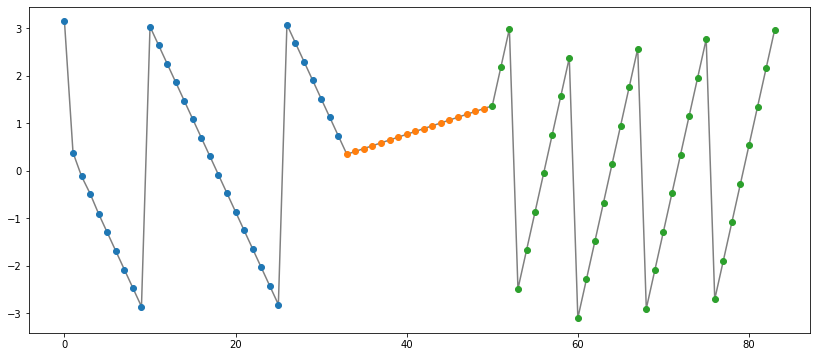

In [8]:
plt.figure(figsize = (14,6))
plt.plot(np.angle(y), color = 'grey')
plt.plot(np.angle(y1), 'o')
plt.plot(np.arange(y2.size)+y1.size, np.angle(y2), 'o')
plt.plot(np.arange(y3.size)+y2.size+y1.size, np.angle(y3), 'o')